<a href="https://colab.research.google.com/github/Honolulu69/Object-Recognition/blob/main/ObjectRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
!pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#api for dataset
!kaggle competitions download -c cifar-10

100% 715M/715M [00:36<00:00, 22.3MB/s]
100% 715M/715M [00:36<00:00, 20.6MB/s]


In [ ]:
!ls

cifar-10.zip  kaggle.json  sample_data


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/cifar-10.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!pip install py7zr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 50.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.3/412.3 kB 39.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 90.8 MB/s eta 0:00:00


In [ ]:
import py7zr

archive = py7zr.SevenZipFile('/content/train.7z', mode='r')
archive.extractall()     #archive.extractall(path='/content/Training Data')
archive.close()

**Importing Initial Libraries**

In [ ]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [ ]:
filenames = os.listdir('/content/train')

In [ ]:
len(filenames)

50000

**Image Label Processing**

In [ ]:
labels_df = pd.read_csv('/content/trainLabels.csv')

In [ ]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [ ]:
labels_df['label'].value_counts()

frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: label, dtype: int64

In [ ]:
labels_dictionary = {'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}

labels = [labels_dictionary[i] for i in labels_df['label']]

In [ ]:
print(labels[0:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


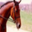

In [ ]:
# displaying sample image
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/35068.png')
cv2_imshow(img)

In [ ]:
labels_df[labels_df['id'] == 35068]

,id,label
35067,35068,horse


In [ ]:
id_list = list(labels_df['id'])

In [ ]:
print(id_list[0:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


**Image Processing**

In [ ]:
# convert images to numpy arrays

train_data_folder = '/content/train/'

data = []

for id in id_list:

  image = Image.open(train_data_folder + str(id) + '.png')
  image = np.array(image)
  data.append(image)

In [ ]:
type(data)

list

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
# convert image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
print(X.shape)
print(Y.shape)

(50000, 32, 32, 3)
(50000,)


**Train-Test Ratio**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


In [ ]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [ ]:
X_train_scaled

array([[[[0.81960784, 0.82352941, 0.79607843],
         [0.83529412, 0.83921569, 0.81960784],
         [0.85490196, 0.85882353, 0.84313725],
         ...,
         [0.49803922, 0.29019608, 0.15294118],
         [0.47843137, 0.26666667, 0.1372549 ],
         [0.45490196, 0.24705882, 0.1254902 ]],

        [[0.82352941, 0.82352941, 0.79215686],
         [0.83529412, 0.83921569, 0.81176471],
         [0.85490196, 0.8627451 , 0.83921569],
         ...,
         [0.48627451, 0.2745098 , 0.1372549 ],
         [0.4745098 , 0.2627451 , 0.12941176],
         [0.48235294, 0.27058824, 0.14117647]],

        [[0.80784314, 0.80392157, 0.76470588],
         [0.81960784, 0.81960784, 0.79215686],
         [0.83529412, 0.84313725, 0.81960784],
         ...,
         [0.48627451, 0.2745098 , 0.14509804],
         [0.51372549, 0.30196078, 0.16470588],
         [0.51372549, 0.30588235, 0.16078431]],

        ...,

        [[0.49803922, 0.42352941, 0.38039216],
         [0.54117647, 0.47843137, 0.43137255]

**Neural Network Design**

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 10

# setting up the layers of Neural Network

model = keras.Sequential([

    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(num_of_classes, activation='softmax')
])

In [ ]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# training the neural network
model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 [==============================] - 6s 3ms/step - loss: 2.1076 - acc: 0.1871 - val_loss: 2.0679 - val_acc: 0.1883
Epoch 2/10
1125/1125 [==============================] - 3s 3ms/step - loss: 2.0334 - acc: 0.2167 - val_loss: 2.0134 - val_acc: 0.2290
Epoch 3/10
1125/1125 [==============================] - 3s 3ms/step - loss: 2.0017 - acc: 0.2399 - val_loss: 1.9996 - val_acc: 0.2412
Epoch 4/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.9795 - acc: 0.2541 - val_loss: 1.9570 - val_acc: 0.2515
Epoch 5/10
1125/1125 [==============================] - 4s 3ms/step - loss: 1.9602 - acc: 0.2629 - val_loss: 1.9540 - val_acc: 0.2555
Epoch 6/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.9520 - acc: 0.2662 - val_loss: 1.9357 - val_acc: 0.2695
Epoch 7/10
1125/1125 [==============================] - 4s 4ms/step - loss: 1.9429 - acc: 0.2676 - val_loss: 1.9410 - val_acc: 0.2785
Epoch 8/10
1125/1125 [==============================] - 5s 4ms

**Transfer Learning Network Development (ResNet50)**

In [ ]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [ ]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
convolutional_base.summary()

94765736/94765736 [==============================] - 5s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                      

In [ ]:
num_of_classes = 10

model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes, activation='softmax'))

In [ ]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [41]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 [==============================] - 447s 397ms/step - loss: 0.6753 - acc: 0.7809 - val_loss: 0.8291 - val_acc: 0.7190
Epoch 2/10
1125/1125 [==============================] - 453s 403ms/step - loss: 0.6181 - acc: 0.8008 - val_loss: 0.7479 - val_acc: 0.7545
Epoch 3/10
1125/1125 [==============================] - 453s 403ms/step - loss: 0.5640 - acc: 0.8183 - val_loss: 0.8379 - val_acc: 0.7272
Epoch 4/10
1125/1125 [==============================] - 447s 397ms/step - loss: 0.5128 - acc: 0.8356 - val_loss: 0.8709 - val_acc: 0.7602
Epoch 5/10
1125/1125 [==============================] - 454s 403ms/step - loss: 0.4787 - acc: 0.8477 - val_loss: 0.7897 - val_acc: 0.7600
Epoch 6/10
1125/1125 [==============================] - 454s 403ms/step - loss: 0.4463 - acc: 0.8581 - val_loss: 0.7643 - val_acc: 0.7628
Epoch 7/10
1125/1125 [==============================] - 447s 397ms/step - loss: 0.4206 - acc: 0.8672 - val_loss: 0.7518 - val_acc: 0.7835
Epoch 8/10
1125/1125 [============

In [42]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

313/313 [==============================] - 39s 120ms/step - loss: 0.8026 - acc: 0.7582
Test Accuracy = 0.7581999897956848


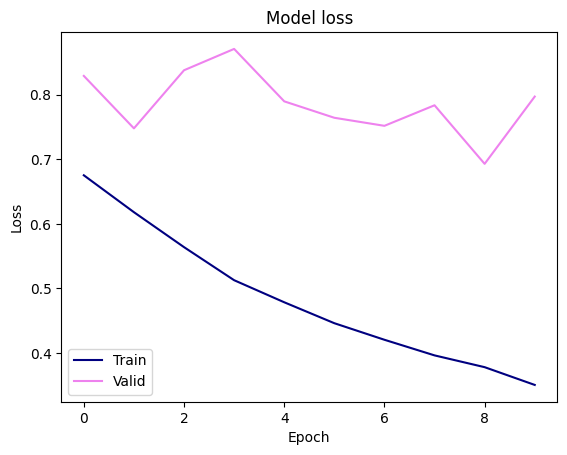

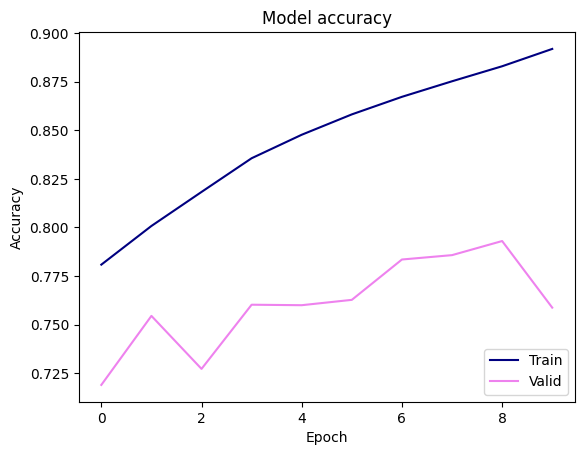

In [46]:
h = history


#loss value plot
plt.plot(h.history['loss'], color = 'navy')
plt.plot(h.history['val_loss'], color = 'violet')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='lower left')
plt.show()


#accuracy value plot
plt.plot(h.history['acc'], color = 'navy')
plt.plot(h.history['val_acc'], color = 'violet')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='lower right')
plt.show()

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Model Evaluation Metrics**

In [47]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [48]:
#precision,recall,f1score

def precision_recall_f1_score(true_labels, pred_labels):

  precision_value = precision_score(true_labels, pred_labels)
  recall_value = recall_score(true_labels, pred_labels)
  f1_score_value = f1_score(true_labels, pred_labels)

  print('Precision =',precision_value)
  print('Recall =',recall_value)
  print('F1 Score =',f1_score_value)